In [43]:
from datasets import load_dataset
ds = load_dataset('json', data_files="../../data/apps_100_llama_prints_1_per_item_corrected_w_acc.json")

Extracting data files: 100%|██████████| 1/1 [00:00<00:00, 454.57it/s]
Generating train split: 100 examples [00:00, 647.39 examples/s]


In [48]:
def get_accuracies(ds):
    accuracies = {feature: [] for feature in ds.features if 'accurac' in feature}
    for i in range(len(ds)):
        for feature in accuracies:
            accuracies[feature].append(ds[i][feature])
   
    return accuracies

accuracies = get_accuracies(ds['train'])
accuracies.keys()
# len(accuracies['baseline_repaired_solution_accuracy'])
# plt.hist(accuracies['baseline_repaired_solution_accuracy'])

dict_keys(['correct_solution_accuracy', 'faulty_solution_accuracy', 'baseline_repaired_solution_accuracy', 'codellama_print_statements_accuracies'])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


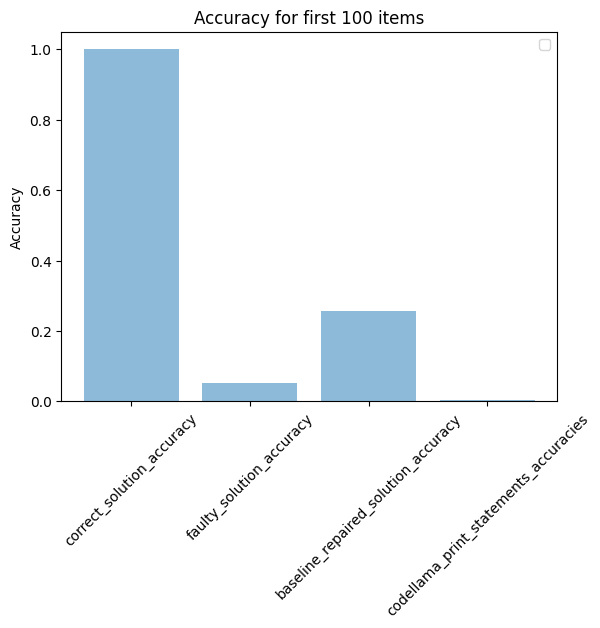

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def plot_accuracies(accuracies):

    plt.bar(range(len(accuracies)), [np.mean(accuracies[feature]) for feature in accuracies], align='center', alpha=0.5)
    plt.xticks(range(len(accuracies)), [feature for feature in accuracies])
    plt.ylabel('Accuracy')
    plt.title('Accuracy for first 100 items')
    plt.xticks(rotation=45)
    plt.legend()
    plt.show()

plot_accuracies(accuracies)

In [42]:
from printllama.helpers import extract_assistant_completion, extract_code
from tqdm import tqdm
from datasets import load_dataset, Dataset
import pandas as pd

# Assuming ds is a Hugging Face dataset or similar
updated_items = []

for item in tqdm(ds['train']):
    print_return = extract_assistant_completion(item['codellama_responses'][0])
    print_return = extract_code([print_return])
    new_item = item.copy()  # Create a copy of the item
    new_item['codellama_print_statements'] = [print_return]
    updated_items.append(new_item)

updated_ds = Dataset.from_pandas(pd.DataFrame(updated_items))
updated_ds.to_json("../../data/apps_100_llama_prints_1_per_item_corrected.json")

Creating json from Arrow format: 100%|██████████| 1/1 [00:00<00:00,  6.52ba/s]


34811582

In [13]:
from printllama.helpers import extract_assistant_completion, extract_code

In [73]:
def solution_algorithm(input_values):
    # Split the input_values string into lines
    lines = input_values.strip().split('\n')

    # Take the first line, which represents n, and convert it to integer
    n = int(lines[0])

    # Take the second line, split it into elements, convert each element to integer, sort them and reverse the list
    seq = sorted(list(map(int, lines[1].split())))[::-1]

    a = seq[0]
    last = -1
    for i in range(len(seq)):
        if a % seq[i] == 0:
            if last != seq[i]:
                last = seq[i]
            else:
                b = seq[i]
                break
        else:
            b = seq[i]
            break

    return a, b
solution_algorithm()

In [80]:
eval(updated_ds[0]['input_output'])['outputs'][0]
# 10\n10 2 8 1 2 4 1 20 4 5\n

'20 8\n'

In [81]:
print(updated_ds[1]['codellama_print_statements'][0][0])

import sys
input = sys.stdin.readline

def main():
    n, m, k = map(str, input().split()) # incorrect data type
    half = m // 3 # incorrect division
    print(f"n={n}, m={m}, k={k}, half={half}")

    se_s = []
    for i in range(n):
        lst = map(int, input().split()) # missing list conversion
        lst.sort()
        total_sub = sum(lst[:half])
        print(f"lst={lst}, total_sub={total_sub}")
        dp = [[1 for _ in range(k)] for _ in range(half + 1)] # wrong initialization
        for num2 in lst:
            for i in range(half, 0, -1):
                for num in dp[i - 1]:
                    pos = (num - num2) % k # wrong operation
                    dp[i][pos] = min(dp[i][pos], num - num2) # wrong function
        se_s.append(set(dp[1])) # wrong index
    
    ans = 1
    ans_sub = set([1]) # wrong initialization
    for se in se_s:
        se_tmp = set()
        for num in se:
            for num2 in ans_sub:
                se_tmp.add(num - num2) # wrong operatio

In [33]:
print(ds['train'][0].keys())

dict_keys(['starter_code', 'solutions', 'problem_id', 'input_output', 'correct_solution_idx', 'correct_solution', 'question', 'difficulty', 'correct_solution_accuracy', 'url', 'faulty_solution_accuracy', 'faulty_solutions', 'baseline_repaired_solution_accuracy', 'baseline_repaired_solutions', 'codellama_print_statements', 'codellama_responses'])


In [82]:
def algo():

    def main():

        print('in main')


    main()

algo()

in main
